In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.arima.model import ARIMA
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


C:\Users\zgcha\AppData\Local\Temp\ipykernel_17244\2813981601.py:32: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data[series_name] = pd.Series(data[series_name]).apply(lambda x: pd.np.log(x))


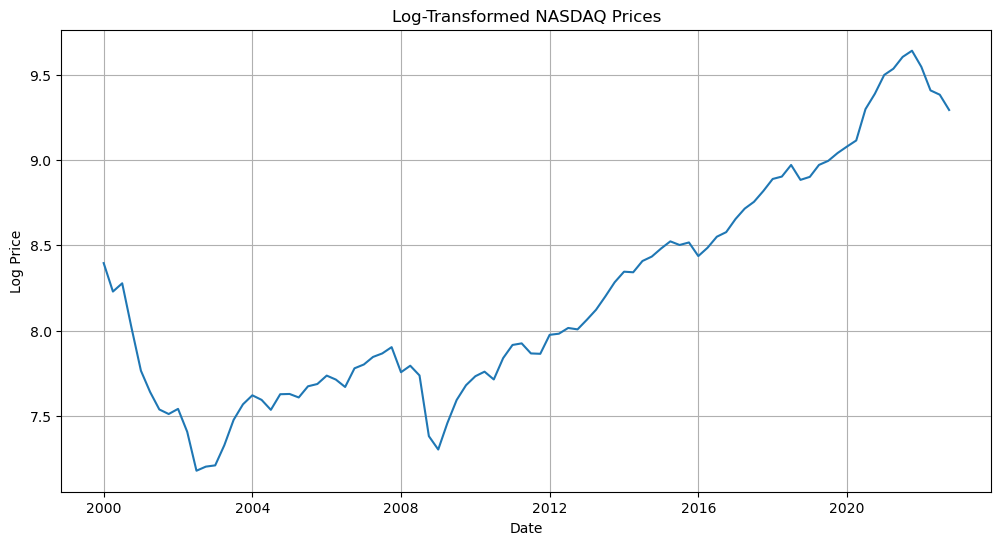

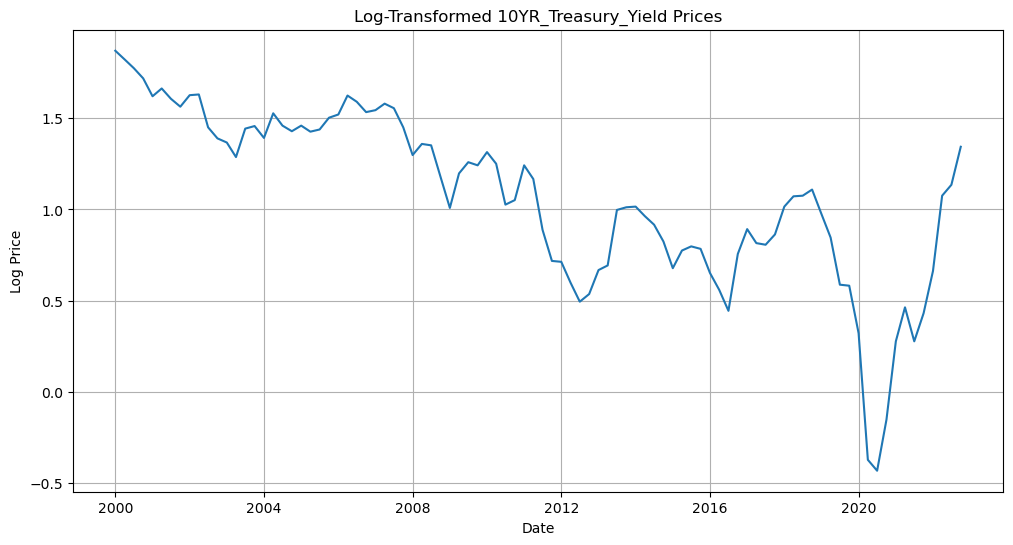

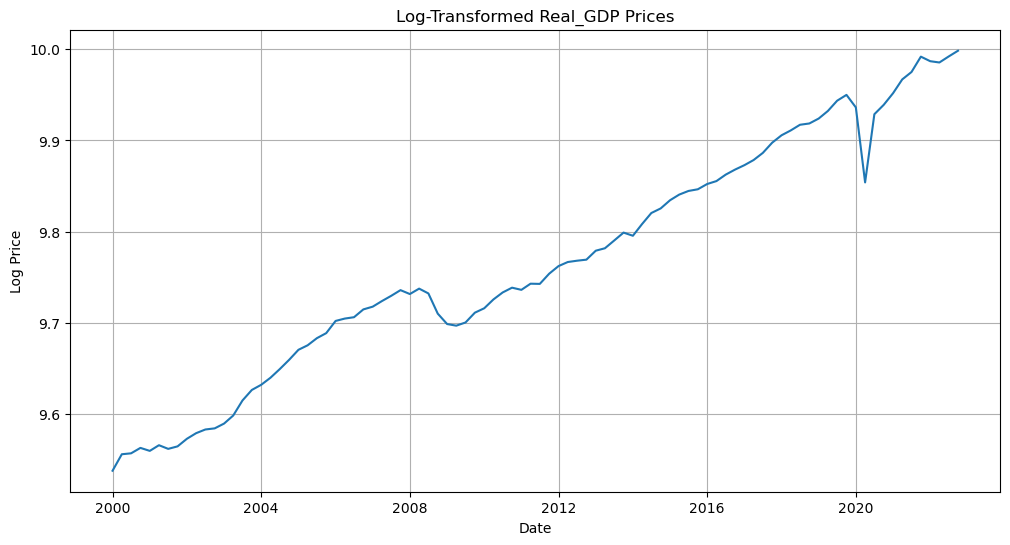

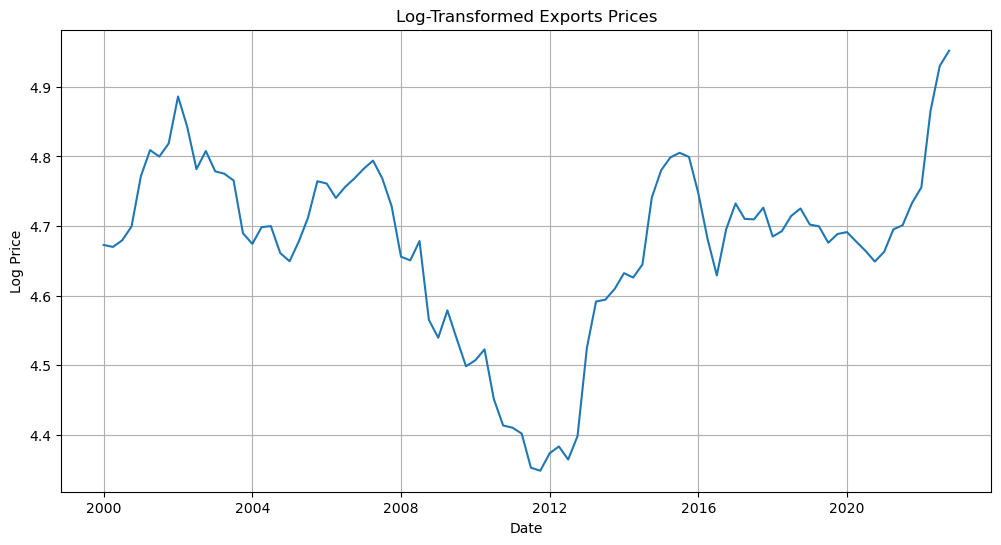

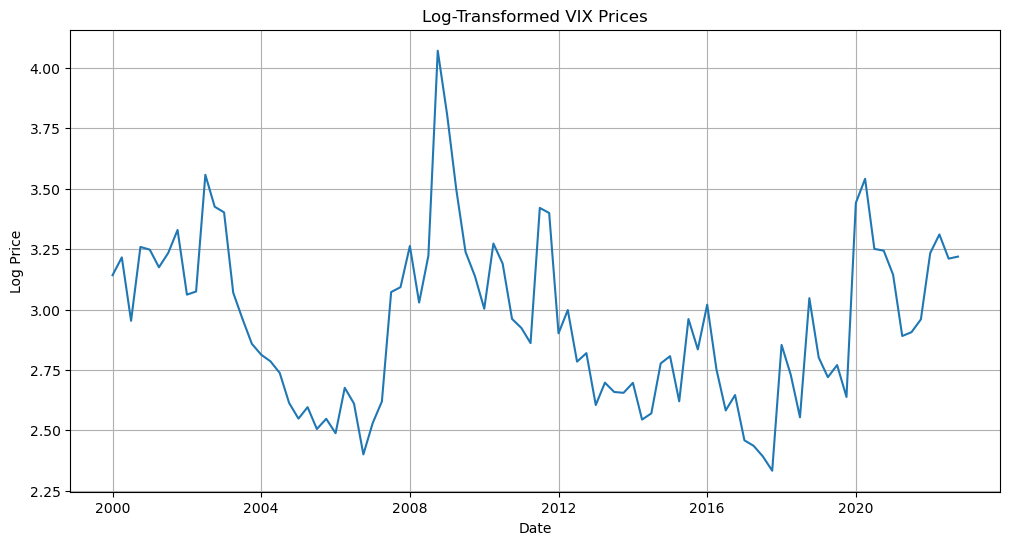

ADF Test for NASDAQ:
ADF Statistic: -0.35159860751482747
p-value: 0.9178718418818032
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
The series NASDAQ is not stationary.
ADF Test for 10YR_Treasury_Yield:
ADF Statistic: -2.1351997972546672
p-value: 0.2305980939979576
Critical Values: {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
The series 10YR_Treasury_Yield is not stationary.
ADF Test for Real_GDP:
ADF Statistic: -0.18624041476708916
p-value: 0.9401419728724472
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
The series Real_GDP is not stationary.
ADF Test for Exports:
ADF Statistic: -1.798160300886522
p-value: 0.38137543493211334
Critical Values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}
The series Exports is not stationary.
ADF Test for VIX:
ADF Statistic: -3.408559799029695
p-value: 0.01067050683337402
Critical 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your actual FRED API key
api_key = '230970faf44ea208229d77dff9f995f3'
fred = Fred(api_key=api_key)

# Define the series IDs
series_ids = {
    

    'NASDAQ': 'NASDAQCOM',
    '10YR_Treasury_Yield': 'GS10',
    'Real_GDP': 'GDPC1',
    'Exports': 'EXJPUS',
    'VIX': 'VIXCLS',
}

# Define the observation period
start_date = '2000-01-01'
end_date = '2022-12-31'

# Download the data
data = {}
for series_name, series_id in series_ids.items():
    data[series_name] = fred.get_series(series_id, start_date, end_date, frequency='q')

# Transform the series (log)
for series_name, series_data in data.items():
    data[series_name] = pd.Series(data[series_name]).apply(lambda x: pd.np.log(x))

# Create a DataFrame from the log-transformed data
df = pd.DataFrame(data)

# Plot the log-transformed series
for series_name in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df[series_name])
    plt.title(f'Log-Transformed {series_name} Prices')
    plt.xlabel('Date')
    plt.ylabel('Log Price')
    plt.grid(True)
    plt.show()

# Perform ADF unit root test after dropping NA values
for series_name in df.columns:
    df[series_name].dropna(inplace=True)  # Drop NA values
    adf_result = sm.tsa.adfuller(df[series_name], autolag='AIC')
    print(f'ADF Test for {series_name}:')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print(f'Critical Values: {adf_result[4]}')

    if adf_result[1] < 0.05:
        print(f'The series {series_name} is stationary after taking first differences.')
    else:
        print(f'The series {series_name} is not stationary.')

# The DataFrame 'df' now contains the log-transformed data for each series.


In [69]:
df.isna().sum()


NASDAQ                 0
10YR_Treasury_Yield    0
Real_GDP               0
Exports                0
VIX                    0
dtype: int64

ADF Test for NASDAQ:
ADF Statistic: -0.35159860751482747
p-value: 0.9178718418818032
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
The series NASDAQ is not stationary.
ADF Test for 10YR_Treasury_Yield:
ADF Statistic: -2.1351997972546672
p-value: 0.2305980939979576
Critical Values: {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
The series 10YR_Treasury_Yield is not stationary.
ADF Test for Real_GDP:
ADF Statistic: -0.18624041476708916
p-value: 0.9401419728724472
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
The series Real_GDP is not stationary.
ADF Test for Exports:
ADF Statistic: -1.798160300886522
p-value: 0.38137543493211334
Critical Values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}
The series Exports is not stationary.
ADF Test for VIX:
ADF Statistic: -3.408559799029695
p-value: 0.01067050683337402
Critical 

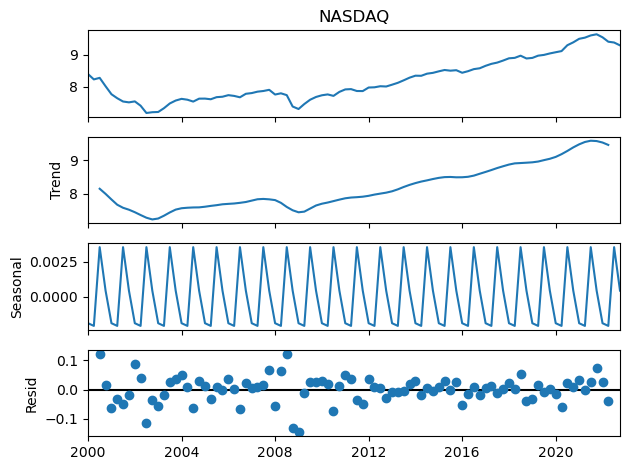

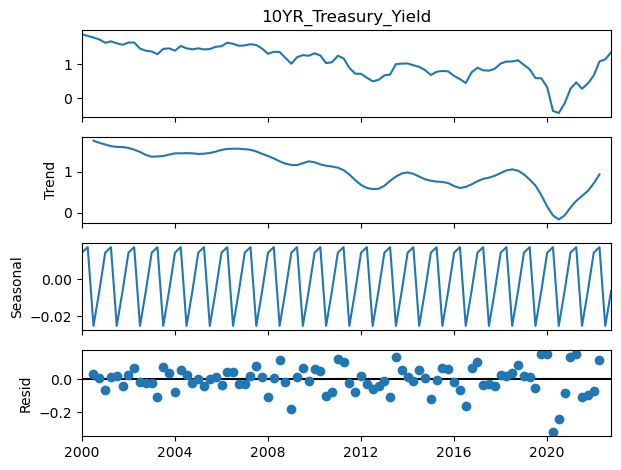

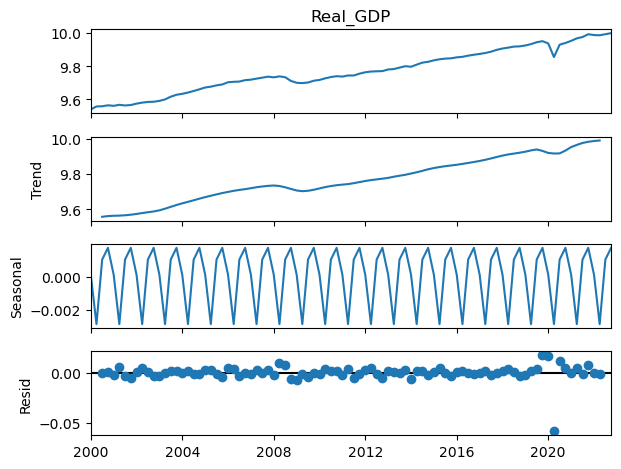

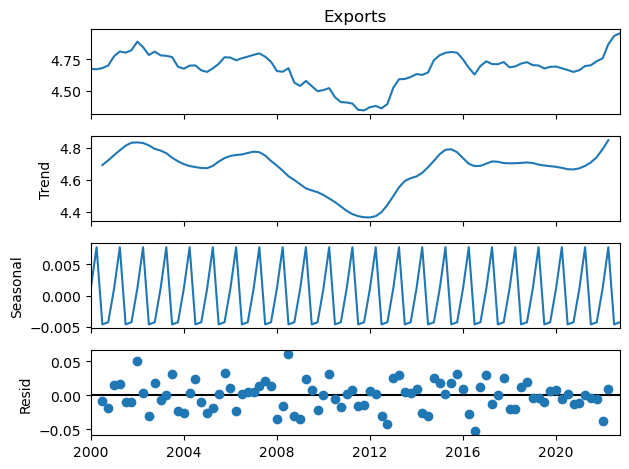

In [70]:
for series_name in df.columns:
    series_data = df[series_name]
    series_data.dropna(inplace=True)  # Drop NA values
    adf_result = sm.tsa.adfuller(series_data, autolag='AIC')
    print(f'ADF Test for {series_name}:')
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print(f'Critical Values: {adf_result[4]}')

    if adf_result[1] < 0.05:
        print(f'The series {series_name} is stationary after taking first differences.')
    else:
        print(f'The series {series_name} is not stationary.')
        decomposition = sm.tsa.seasonal_decompose(series_data, model='additive', period=4)
        trend_component = decomposition.trend
        seasonal_component = decomposition.seasonal
        residual_component = decomposition.resid
        decomposition.plot()
        
       

<AxesSubplot:>

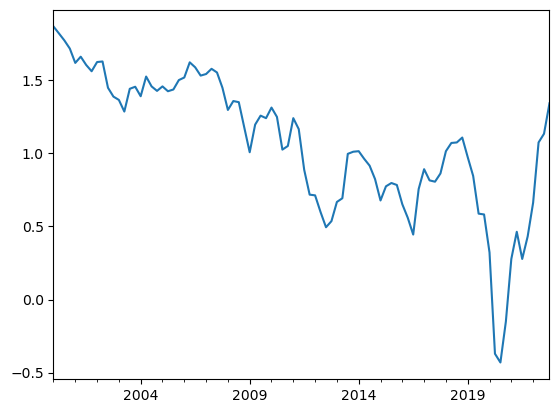

In [71]:
(df['10YR_Treasury_Yield']).plot()

In [72]:
sdata = df.copy().pct_change().dropna()
for i in sdata.columns: 
    var = sdata[i].dropna()
    results = (sm.tsa.adfuller(var))
    if results[1] < 0.05: 
        print(i, 'is stationnary')
        


NASDAQ is stationnary
10YR_Treasury_Yield is stationnary
Real_GDP is stationnary
Exports is stationnary
VIX is stationnary


In [73]:
sdata

,NASDAQ,10YR_Treasury_Yield,Real_GDP,Exports,VIX
2000-04-01,-0.019880,-0.025366,0.001892,-0.000614,0.023449
2000-07-01,0.005886,-0.026389,0.000107,0.002035,-0.081577
2000-10-01,-0.031662,-0.031502,0.000623,0.004277,0.103448
2001-01-01,-0.031268,-0.057067,-0.000343,0.015404,-0.003439
2001-04-01,-0.016044,0.026332,0.000651,0.007823,-0.022460
...,...,...,...,...,...
2021-10-01,0.003794,0.555234,0.001687,0.006778,0.018137
2022-01-01,-0.009819,0.534773,-0.000499,0.004755,0.092765
2022-04-01,-0.014461,0.622185,-0.000142,0.023110,0.023805
2022-07-01,-0.002685,0.055461,0.000657,0.013337,-0.030238


NASDAQ


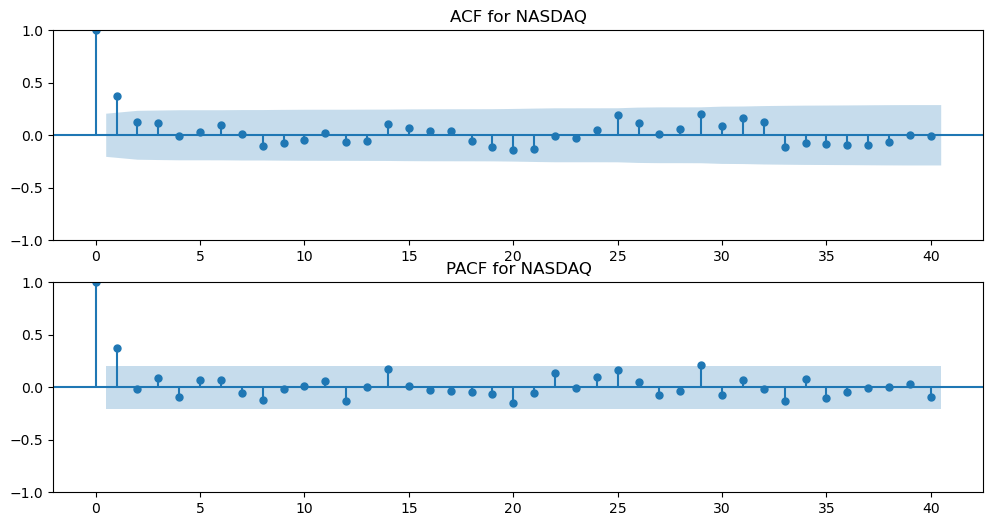

10YR_Treasury_Yield


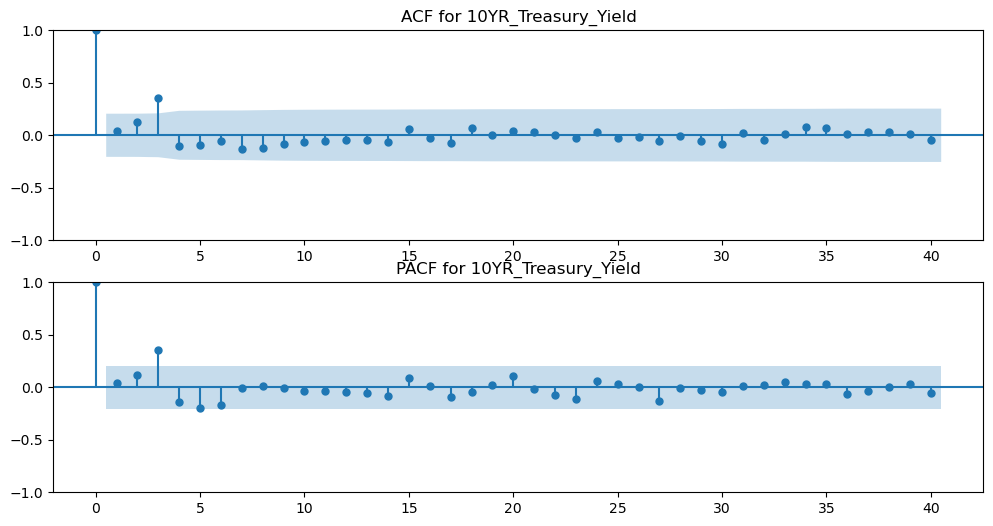

Real_GDP


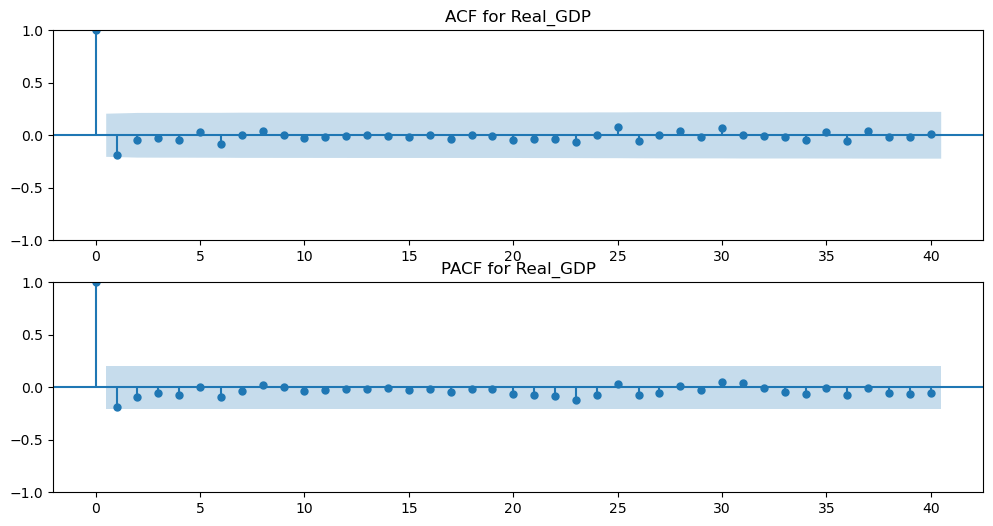

Exports


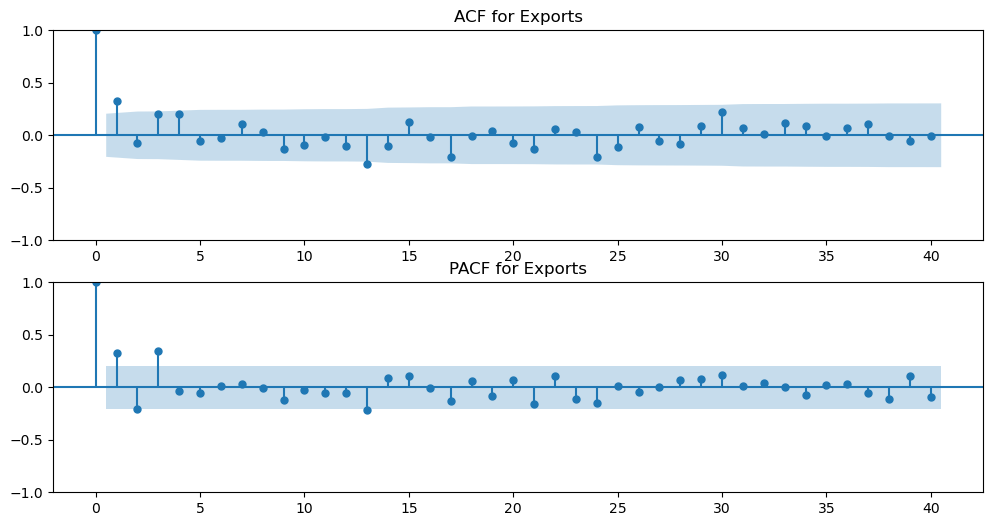

VIX


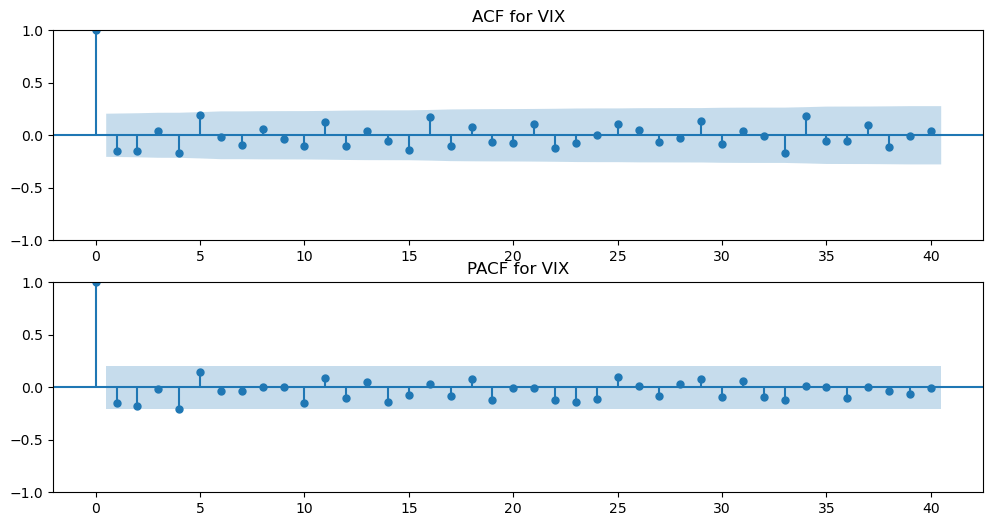

In [74]:
stationnary_df = sdata.dropna()


for i in stationnary_df.columns: 
    plt.figure(figsize=(12,6))
    ax1=plt.subplot(211)
    print(i)
    ax2=plt.subplot(212)

    plot_acf(sdata[i], ax=ax1, lags=40)
    plot_pacf(sdata[i], ax=ax2, lags=40)
    ax1.set_title(f'ACF for {i}')
    ax2.set_title(f'PACF for {i}')

    plt.show()

In [75]:
sdata.columns

Index(['NASDAQ', '10YR_Treasury_Yield', 'Real_GDP', 'Exports', 'VIX'], dtype='object')

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary for SP500:
                               SARIMAX Results                                
Dep. Variable:                 NASDAQ   No. Observations:                   91
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 283.901
Date:                Sun, 29 Oct 2023   AIC                           -559.803
Time:                        22:02:37   BIC                           -549.759
Sample:                    04-01-2000   HQIC                          -555.751
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.002      0.480      0.631      -0.003       0.005
ar.L1          0.0477      0.275      0.174      0.862      -0.491       0.586
ma.L1          0.3878

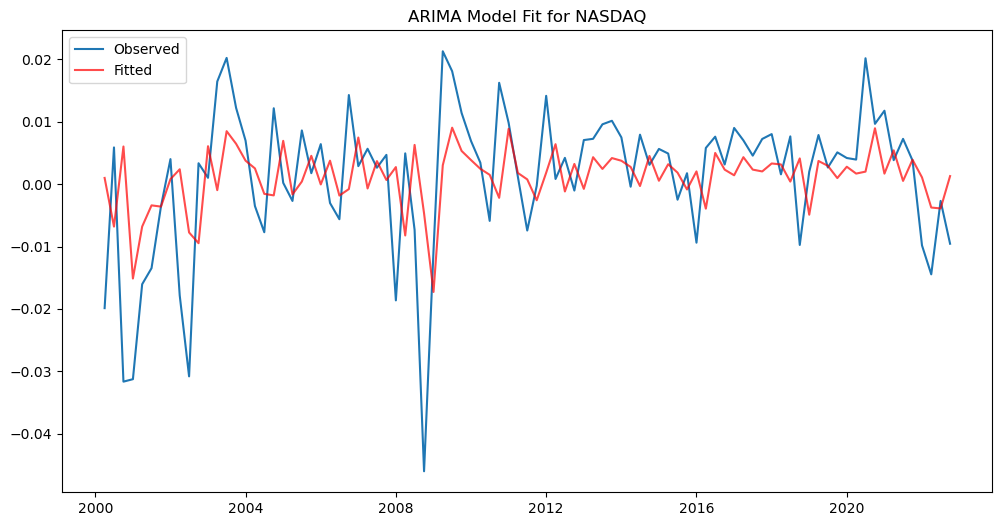

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary for SP500:
                                SARIMAX Results                                
Dep. Variable:     10YR_Treasury_Yield   No. Observations:                   91
Model:                  ARIMA(3, 0, 3)   Log Likelihood                 -40.949
Date:                 Sun, 29 Oct 2023   AIC                             97.897
Time:                         22:02:38   BIC                            117.984
Sample:                     04-01-2000   HQIC                           106.001
                          - 10-01-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0474      0.126     -0.378      0.706      -0.293       0.199
ar.L1         -0.0486      0.296     -0.164      0.870      -0.629       0.532
ar.L2        

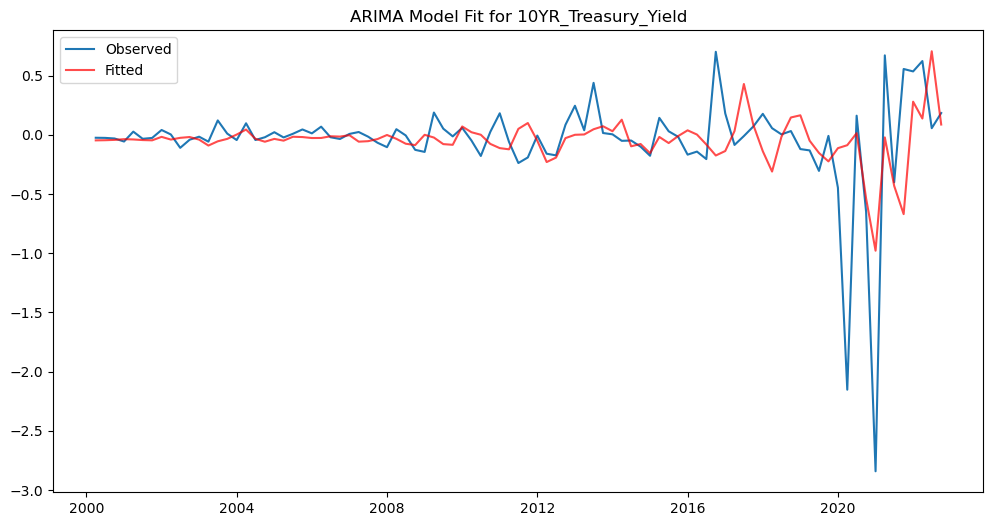

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary for SP500:
                               SARIMAX Results                                
Dep. Variable:               Real_GDP   No. Observations:                   91
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 475.161
Date:                Sun, 29 Oct 2023   AIC                           -942.321
Time:                        22:02:38   BIC                           -932.278
Sample:                    04-01-2000   HQIC                          -938.269
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.589      0.010       0.000       0.001
ar.L1          0.2894      0.543      0.533      0.594      -0.775       1.354
ma.L1         -0.5020

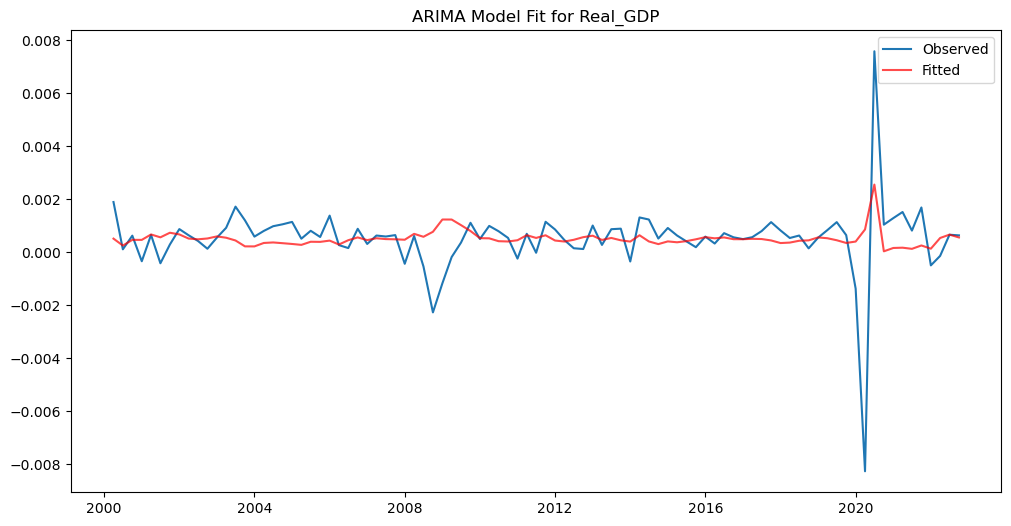

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary for SP500:
                               SARIMAX Results                                
Dep. Variable:                Exports   No. Observations:                   91
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 314.100
Date:                Sun, 29 Oct 2023   AIC                           -620.200
Time:                        22:02:39   BIC                           -610.156
Sample:                    04-01-2000   HQIC                          -616.148
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.572      0.567      -0.002       0.003
ar.L1         -0.1683      0.240     -0.702      0.483      -0.638       0.301
ma.L1          0.6547

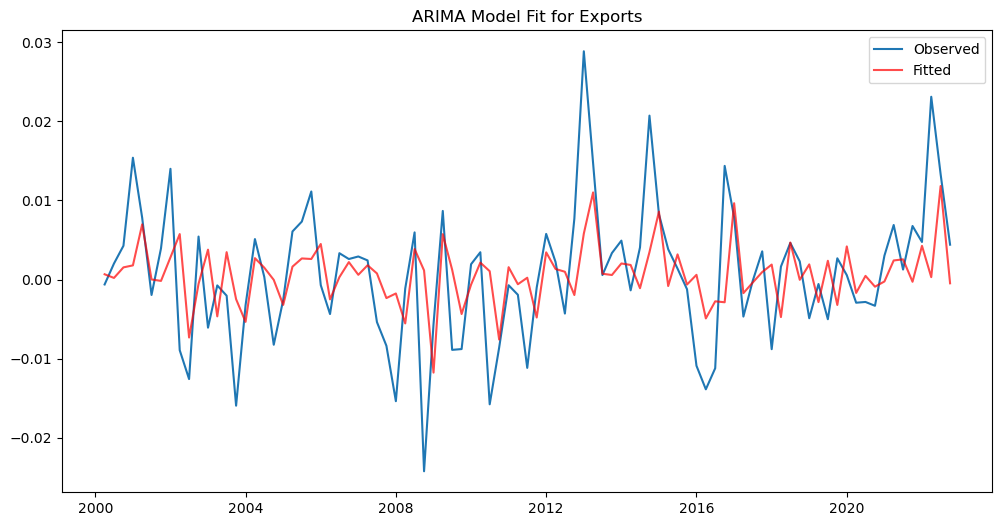

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary for SP500:
                               SARIMAX Results                                
Dep. Variable:                    VIX   No. Observations:                   91
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 103.442
Date:                Sun, 29 Oct 2023   AIC                           -196.885
Time:                        22:02:39   BIC                           -184.330
Sample:                    04-01-2000   HQIC                          -191.820
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.008      0.428      0.669      -0.012       0.018
ar.L1          0.3045      0.461      0.660      0.509      -0.599       1.208
ar.L2         -0.0942

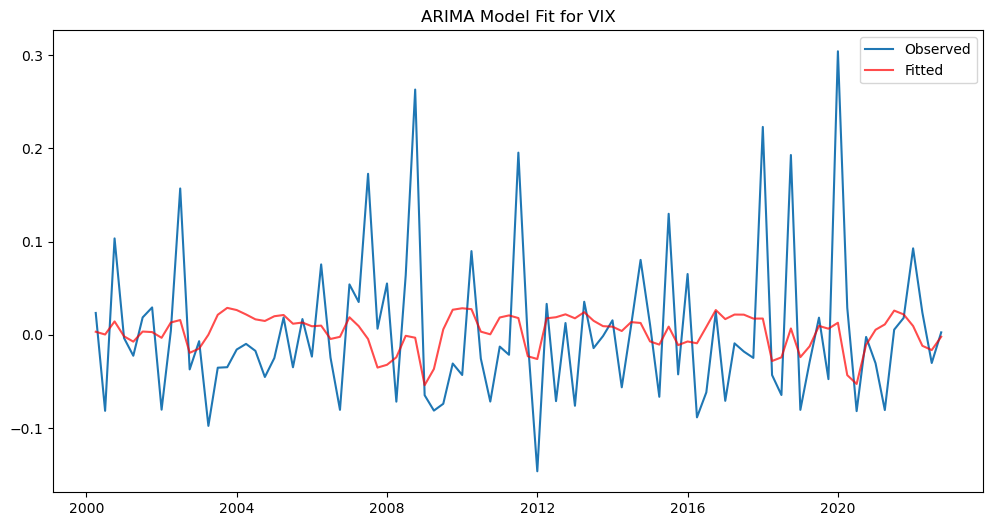

In [76]:
for i in stationnary_df.columns: 
    
    # Fit an ARIMA model to the stationary series
    if i =='NASDAQ': 
        p = 1  # Adjust the AR order
        d = 0  # Differencing order (1 for first differences)
        q = 1  # Adjust the MA order
    elif i == 'Real_GDP':
        p = 1  # Adjust the AR order
        d = 0  # Differencing order (1 for first differences)
        q = 1 
    elif i == '10YR_Treasury_Yield':
        p = 3  # Adjust the AR order
        d = 0  # Differencing order (1 for first differences)
        q = 3
    elif i == 'Exports':
        p = 1  # Adjust the AR order
        d = 0  # Differencing order (1 for first differences)
        q = 1
    else :
        p = 2  # Adjust the AR order
        d = 0 
        q = 1
        
        
    arima_model = ARIMA(stationnary_df[i], order=(p, d, q))
    arima_result = arima_model.fit()

    # Print the ARIMA model summary
    print(f'ARIMA Model Summary for SP500:')
    print(arima_result.summary())

    # Plot the observed vs. fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(stationnary_df[i], label='Observed')
    plt.plot(arima_result.fittedvalues, color='red', label='Fitted', alpha=0.7)
    plt.legend()
    plt.title('ARIMA Model Fit for {}'.format(i))
    plt.show()

In [77]:
stationnary_df.columns

Index(['NASDAQ', '10YR_Treasury_Yield', 'Real_GDP', 'Exports', 'VIX'], dtype='object')

In [78]:
from statsmodels.tsa.api import VAR

# Print the selected lag order

In [79]:
best_aic = np.inf
best_order = None
for p in range(1, 6):  # Loop through different lag orders
    model = VAR(sdata)
    results = model.fit(p)
    aic = results.aic
    if aic < best_aic:
        best_aic = aic
        best_order = p
model = VAR(stationnary_df)
results = model.fit(best_order)

# Summary of the VAR model
print(f'Best Lag Order: {best_order}')
print(results.summary())

Best Lag Order: 3
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, Oct, 2023
Time:                     22:03:05
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -37.9463
Nobs:                     88.0000    HQIC:                  -39.2911
Log likelihood:           1224.40    FPE:                3.55562e-18
AIC:                     -40.1984    Det(Omega_mle):     1.54228e-18
--------------------------------------------------------------------
Results for equation NASDAQ
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.002423         0.001532            1.582           0.114
L1.NASDAQ                      0.522170         0.134220            3.890           0.000
L1.10

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_mo